# Chapter 5 Resampling Methods

## Exercise 2
### 2.a
Since the bootstrap sampling method is performed with replacement, every observation has an equal probability of being selected at each draw: $$p_{selected} = \frac{1}{n}$$.
The probability that an observation is not selected at each draw is complementary to the probability it is selected: $$p'_{selected} = 1 - p_{selected} = 1 - \frac{1}{n}$$
So, the probability that the first bootstrap observation is not the *j*th observation from the original sample is: $p' = 1 - \frac{1}{n}$

### 2.b
Similarly, since the bootstrap method is performed with replacement, the probability that the second bootstrap observation is not the *j*th observation from the original sample equals that of the first, and is: $p' = 1 - \frac{1}{n}$.

### 2.c
For the *j*th observation from the original sample to be not in the bootstrap sample, it satisfies the condition that each of the bootstrap observation must not be the *j*th observation. Suppose that the bootstrap sample size equals n, the conditional probability is: $$p' = (1 - \frac{1}{n})^n$$

### 2.d - 2.f
The probability of observation *j*th being in the bootstrap sample is complementary to the probability that it is not, and equals to: $$p = 1 - p' = 1 - (1 - \frac{1}{n})^n$$
With n = 5, 100 and 10000 respectively, the probability of *j*th observation being in the bootstrap sample is: (see below)

### 2.g
(graph: see below)
As n increases, the probability of observation *j*th being in the bootstrap sample converges to 0.6

The probability of jth observation being in the bootstrap sample as n = 5 	is 0.67232
The probability of jth observation being in the bootstrap sample as n = 100 	is 0.63397
The probability of jth observation being in the bootstrap sample as n = 10000 	is 0.63214


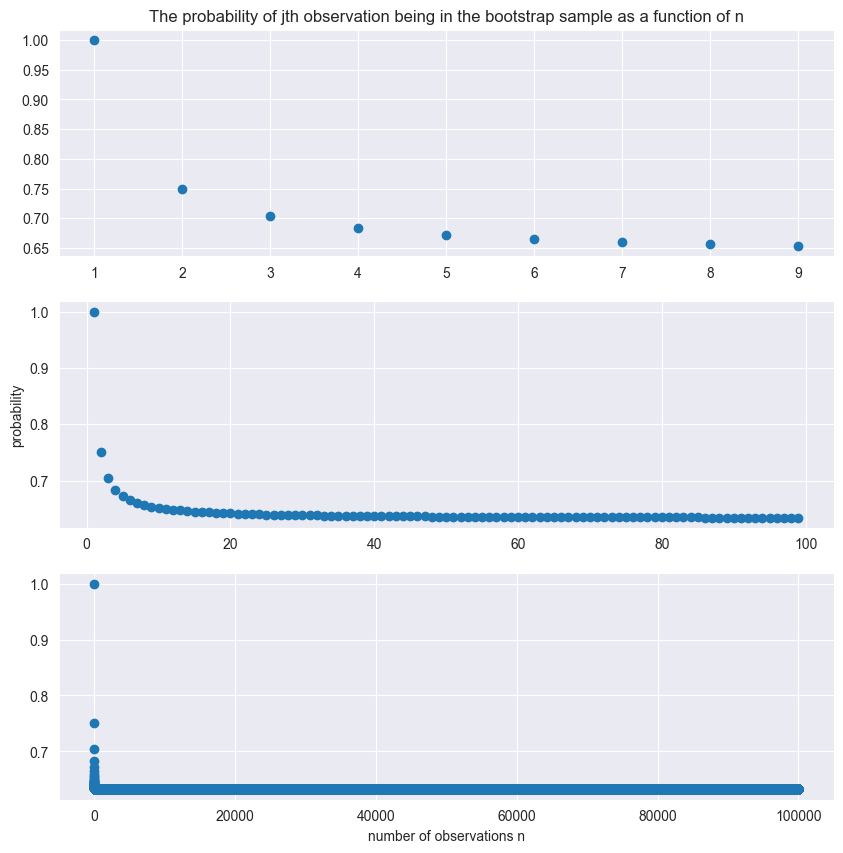

In [1]:
# 2.d - 2.g

import random
random.seed(0)
import numpy as np
import matplotlib.pyplot as plt

# 2.d - 2.f
def func_prob(n):
    return 1 - (1-1/n)**n

answer_str = 'The probability of jth observation being in the bootstrap sample as n = {0} \tis {1:.5g}'
print(answer_str.format(5, func_prob(5)))
print(answer_str.format(100, func_prob(100)))
print(answer_str.format(10000, func_prob(10000)))

# 2.g
ns = [10, 100, 100000]
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for n, ax in zip(ns, axes):
    x = np.arange(1, n, 1, dtype=int)
    y = func_prob(x)
    ax.scatter(x,y)

axes[2].set_xlabel('number of observations n')
axes[1].set_ylabel('probability')
axes[0].set_title('The probability of jth observation being in the bootstrap sample as a function of n');

In [2]:
# 2.h
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

np.float64(0.0089)

## Exercise 3

### 3.a
k-fold cross-validation is implemented as follows:
1. The set of observation is randomly divided into $k$ groups (folds) of approximately equal size
2. The first fold is treated as the validation set, the model is fit on the remaining $k-1$ folds
3. The $MSE_i$ is computed on the observations in the held-out validation fold.
4. Repeat 2 and 3 using a different fold $k$ times
5. Compute the k-fold CV estimates by averaging the $MSE_i$ values using the formula: $CV_{(k)} = \frac{1}{k}\sum_{i=1}^{k}MSE_i$

### 3.b
Compared to the validation set and the LOOCV approaches, the k-fold cross-validation has the following advantages and disadvantages:
|               | Validation set approach                                             | LOOCV                                             |
|---------------|---------------------------------------------------------------------|---------------------------------------------------|
| Advantages of k-fold CV   | More stable test error rate<br/>More data for the model to train on | Less computationally expensive<br/>Lower variance |
| Disadvantages of k-fold CV | More computationally expensive                                      | Higher bias                                       |

## Exercise 4
Let $n$ be the number of observations.
To calculate the standard deviation of the prediction for a particular value of the predictor $X$, since the specific statistical learning method is unknown, a resampling method should be used. The bootstrap method is a notable candidate.
The procedure is as follows:
1. Generate B bootstrap datasets, each contains n observations from the original dataset.
2. For each bootstrap dataset, train the statistical learning model to obtain a new model $\hat{f}^b_i$, for $i = 1, 2, ... B$.
3. Use each of these B models to make a prediction for the specific predictor $X$. We obtain a set of B predicted values $\hat{y}^b_i$ for $i = 1, 2, ... B$.
4. Calculate the sample standard deviation of these B predicted values using the following formula: $$SE_B(\hat{f}(X)) = \sqrt{\frac{1}{B-1}\sum_{i=1}^{B}{(\hat{y}^b_i - \frac{1}{B}\sum_{j=1}^{B}{\hat{y}^b_j}})^2}$$

## Exercise 5
